In [1]:
import os
import sys
from dotenv import load_dotenv

load_dotenv()
sys.path.append(os.environ.get('PATH_CUSTOM_MODULES'))

import augment_image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

c:\Users\Bugi\miniconda3\envs\env_skripsi\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\Bugi\miniconda3\envs\env_skripsi\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an 

### Prepare all the variable

In [2]:
path_source = os.environ.get('PATH_DATASET_DESTINATION')
scenario_names = ['scenario_1', 'scenario_2', 'scenario_3', 'scenario_4', 'scenario_5']
dataset_names = ['rimone', 'g1020', 'refuge', 'papila']
fold_names = ['fold_1', 'fold_2', 'fold_3', 'fold_4', 'fold_5']
labels_name = ['normal', 'glaukoma']
image_size = {'rimone': (300,300),
            'g1020': (240,300),
            'refuge': (300,300),
            'papila': (200,300)}

In [3]:
# merge path source and path destination
# for each dataset, scenario, and label
path_dataset_src = {}
path_dataset_val_test_src = {}
path_dataset_aug = {}
path_dataset_val_test_dest = {}
## create the source path
for scenario in scenario_names:
    for dataset in dataset_names:
        for fold in fold_names:
                path_dataset_src[scenario + '_'
                                + dataset + '_'
                                + fold] = os.path.join(path_source,
                                                        scenario,
                                                        dataset,
                                                        fold,
                                                        'train')
del scenario, dataset, fold
## create the source path for val and test
for scenario in scenario_names:
    for dataset in dataset_names:
        for fold in fold_names:
            for data_type in ['val', 'test']:
                path_dataset_val_test_src[scenario + '_'
                                        + dataset + '_'
                                        + fold + '_'
                                        + data_type] = os.path.join(path_source,
                                                                    scenario,
                                                                    dataset,
                                                                    fold,
                                                                    data_type)
del scenario, dataset, fold, data_type
## create the destination path a.k.a. augmented path
for scenario in scenario_names:
    for dataset in dataset_names:
        for fold in fold_names:
            for label in labels_name:
                path_dataset_aug[scenario + '_'
                                + dataset + '_'
                                + fold + '_'
                                + label] = os.path.join(path_source,
                                                        scenario,
                                                        dataset,
                                                        fold,
                                                        'train_augmented',
                                                        label)
del scenario, dataset, fold, label
## create the destination path for val and test
for scenario in scenario_names:
    for dataset in dataset_names:
        for fold in fold_names:
            for data_type in ['val', 'test']:
                for label in labels_name:
                    path_dataset_val_test_dest[scenario + '_'
                                                + dataset + '_'
                                                + fold + '_'
                                                + data_type + '_'
                                                + label] = os.path.join(path_source,
                                                                        scenario,
                                                                        dataset,
                                                                        fold,
                                                                        data_type,
                                                                        label)
del scenario, dataset, fold, data_type, label

In [4]:
# create the image data generator
## data generator for scenario 1 (no augmentation)
datagenerator_s1 = ImageDataGenerator(
    rescale=1./255,
)
## data generator for scenario 2, 3, 4, and 5 (with augmentation)
datagenerator_s2345 = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[1, 1.5]
)

### Prepare Augment Directory

In [39]:
# create the directory for the augmented dataset
directory_result = augment_image.create_directory(path_dict=path_dataset_aug)
## print the result
for key, values in directory_result.items():
    if key == 'Already Exists' and values != []:
        for value in values:
            print('Directory already exists:', value)

### Scenario 1
no augmentation, rgb color, no clahe
#### Show Image

In [40]:
# get the image using image data generator
## define the augmentation mode for scenario 1
s1_src = {}
s1_augment = 'none'
s1_col_mode = 'rgb'
## load image using image data generator
for dataset in dataset_names:
    for fold in fold_names:
        for label in labels_name:
            print(f'Loading {dataset} {fold} {label}...')
            s1_src[dataset + '_'
                    + fold + '_'
                    + label] = (datagenerator_s1.flow_from_directory(
                                path_dataset_src[scenario_names[0] + '_'
                                                + dataset + '_'
                                                + fold],
                                target_size=image_size[dataset],
                                color_mode=s1_col_mode,
                                class_mode='binary',
                                classes=[label],
                                shuffle=True,
                                seed=1915026018))
del dataset, fold, label

Loading rimone fold_1 normal...
Found 218 images belonging to 1 classes.
Loading rimone fold_1 glaukoma...
Found 121 images belonging to 1 classes.
Loading rimone fold_2 normal...
Found 218 images belonging to 1 classes.
Loading rimone fold_2 glaukoma...
Found 121 images belonging to 1 classes.
Loading rimone fold_3 normal...
Found 218 images belonging to 1 classes.
Loading rimone fold_3 glaukoma...
Found 121 images belonging to 1 classes.
Loading rimone fold_4 normal...
Found 219 images belonging to 1 classes.
Loading rimone fold_4 glaukoma...
Found 120 images belonging to 1 classes.
Loading rimone fold_5 normal...
Found 219 images belonging to 1 classes.
Loading rimone fold_5 glaukoma...
Found 120 images belonging to 1 classes.
Loading g1020 fold_1 normal...
Found 506 images belonging to 1 classes.
Loading g1020 fold_1 glaukoma...
Found 208 images belonging to 1 classes.
Loading g1020 fold_2 normal...
Found 506 images belonging to 1 classes.
Loading g1020 fold_2 glaukoma...
Found 208

In [41]:
list(s1_src.keys())[0]

'rimone_fold_1_normal'

Showing rimone_fold_1_normal...


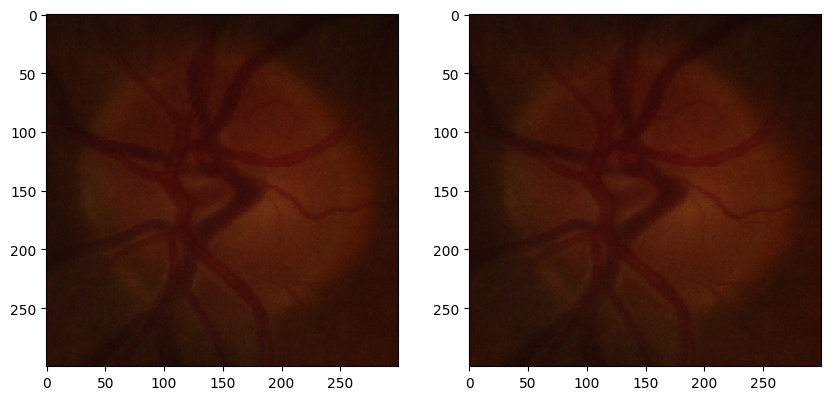

Showing g1020_fold_1_normal...


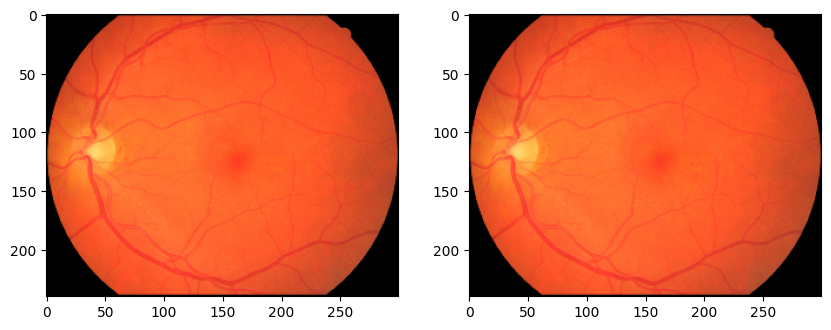

Showing refuge_fold_1_normal...


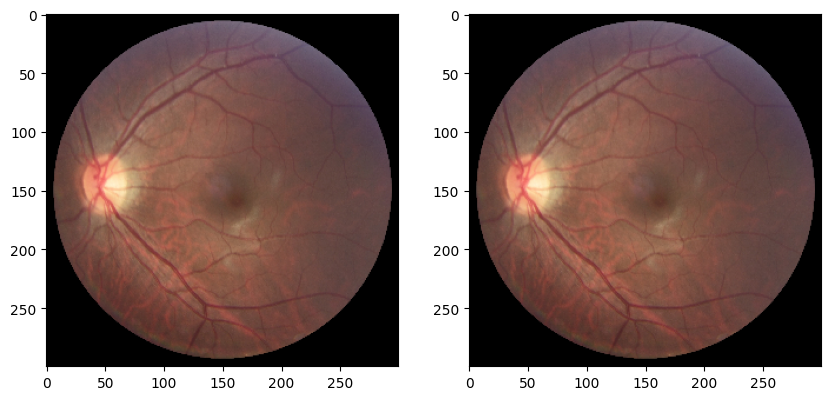

Showing papila_fold_1_normal...


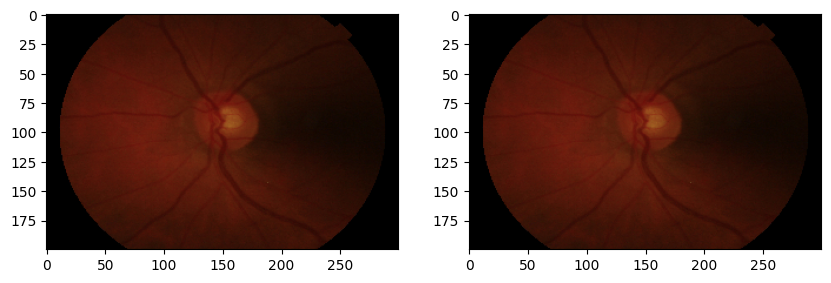

In [42]:
# show the image for scenario 1
for dataset_name, datagen in s1_src.items():
    if(dataset_name.split('_')[-1] == 'normal'
        and dataset_name.split('_')[-2] == '1'):
        print(f'Showing {dataset_name}...')
        image = next(datagen)
        augment_image.show_augmented_img(image=image[0][0],
                                        augment_type=s1_augment,
                                        color_mode=s1_col_mode)
del dataset_name, datagen, image

### Scenario 2
basic augmentation, rgb color, no clahe
#### Show Image

In [43]:
# get the image using image data generator
## define the augmentation mode for scenario 2
s2_src = {}
s2_augment = ['h_flip', 'v_flip', 'bright', 'rot']
s2_col_mode = 'rgb'
## load image using image data generator
for dataset in dataset_names:
    for fold in fold_names:
        for label in labels_name:
            print(f'Loading {dataset} {fold} {label}...')
            s2_src[dataset + '_'
                    + fold + '_'
                    + label] = (datagenerator_s2345.flow_from_directory(
                                path_dataset_src[scenario_names[1] + '_'
                                                + dataset + '_'
                                                + fold],
                                target_size=image_size[dataset],
                                color_mode=s2_col_mode,
                                class_mode='binary',
                                classes=[label],
                                shuffle=True,
                                seed=1915026018,
                                save_to_dir=path_dataset_aug[scenario_names[1] + '_'
                                                            + dataset + '_'
                                                            + fold + '_'
                                                            + label],
                                save_prefix=f's2_{dataset}_{fold}_{label}',
                                save_format='jpg'))
del dataset, fold, label

Loading rimone fold_1 normal...
Found 218 images belonging to 1 classes.
Loading rimone fold_1 glaukoma...
Found 121 images belonging to 1 classes.
Loading rimone fold_2 normal...
Found 218 images belonging to 1 classes.
Loading rimone fold_2 glaukoma...
Found 121 images belonging to 1 classes.
Loading rimone fold_3 normal...
Found 218 images belonging to 1 classes.
Loading rimone fold_3 glaukoma...
Found 121 images belonging to 1 classes.
Loading rimone fold_4 normal...
Found 219 images belonging to 1 classes.
Loading rimone fold_4 glaukoma...
Found 120 images belonging to 1 classes.
Loading rimone fold_5 normal...
Found 219 images belonging to 1 classes.
Loading rimone fold_5 glaukoma...
Found 120 images belonging to 1 classes.
Loading g1020 fold_1 normal...
Found 506 images belonging to 1 classes.
Loading g1020 fold_1 glaukoma...
Found 208 images belonging to 1 classes.
Loading g1020 fold_2 normal...
Found 506 images belonging to 1 classes.
Loading g1020 fold_2 glaukoma...
Found 208

Showing rimone fold_1 normal augmented h_flip...


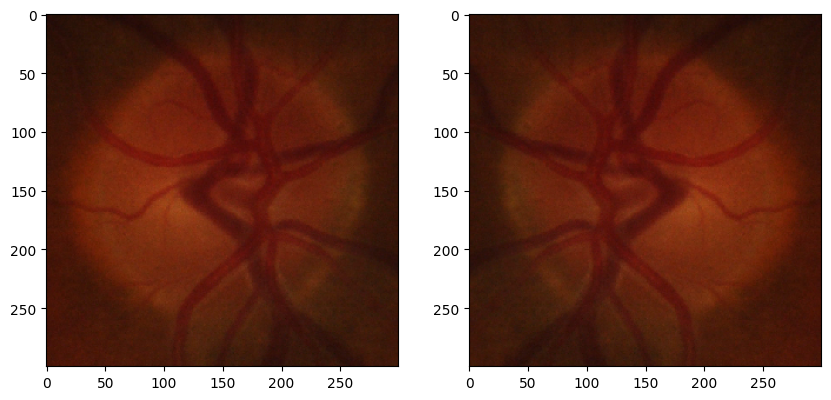

Showing rimone fold_1 normal augmented v_flip...


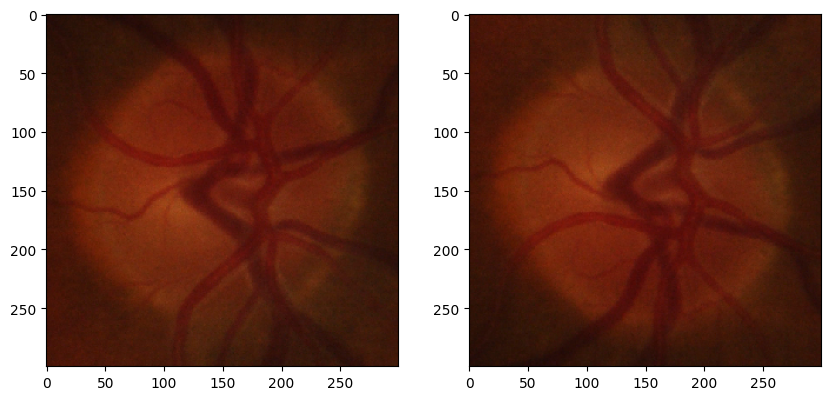

Showing rimone fold_1 normal augmented bright...


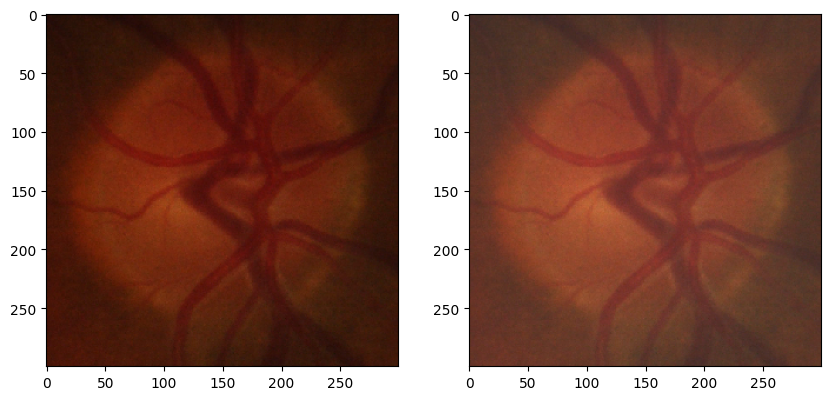

Showing rimone fold_1 normal augmented rot...


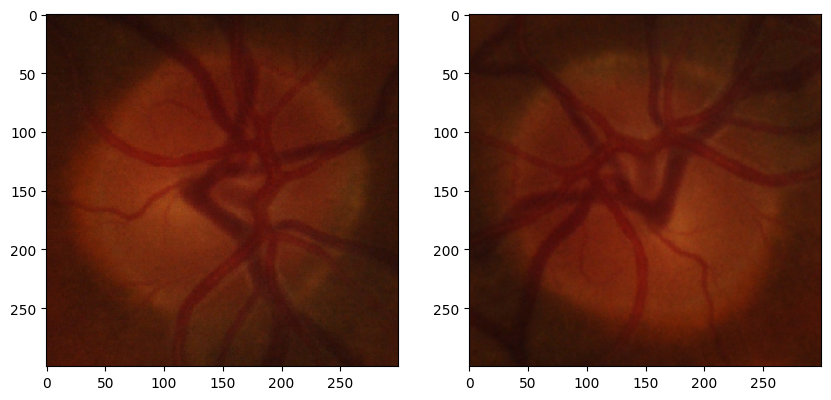

Saving rimone fold_1 normal batch 1 augmented...
Saving rimone fold_1 normal batch 2 augmented...
Saving rimone fold_1 normal batch 3 augmented...
Saving rimone fold_1 normal batch 4 augmented...
Saving rimone fold_1 normal batch 5 augmented...
Saving rimone fold_1 normal batch 6 augmented...
Saving rimone fold_1 glaukoma batch 1 augmented...
Saving rimone fold_1 glaukoma batch 2 augmented...
Saving rimone fold_1 glaukoma batch 3 augmented...
Saving rimone fold_2 normal batch 1 augmented...
Saving rimone fold_2 normal batch 2 augmented...
Saving rimone fold_2 normal batch 3 augmented...
Saving rimone fold_2 normal batch 4 augmented...
Saving rimone fold_2 normal batch 5 augmented...
Saving rimone fold_2 normal batch 6 augmented...
Saving rimone fold_2 glaukoma batch 1 augmented...
Saving rimone fold_2 glaukoma batch 2 augmented...
Saving rimone fold_2 glaukoma batch 3 augmented...
Saving rimone fold_3 normal batch 1 augmented...
Saving rimone fold_3 normal batch 2 augmented...
Saving r

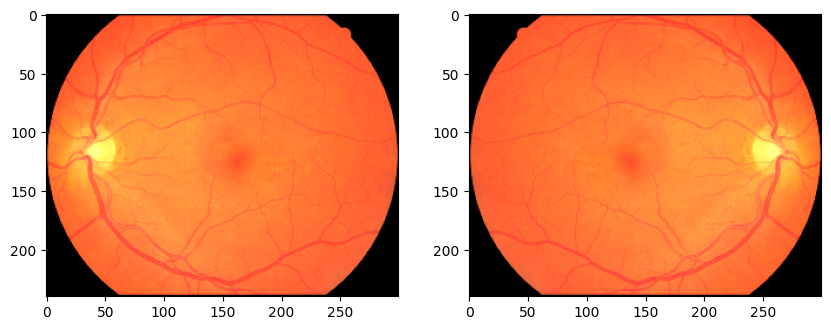

Showing g1020 fold_1 normal augmented v_flip...


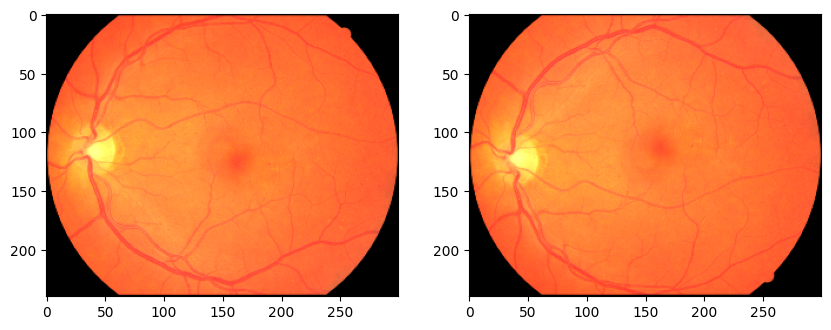

Showing g1020 fold_1 normal augmented bright...


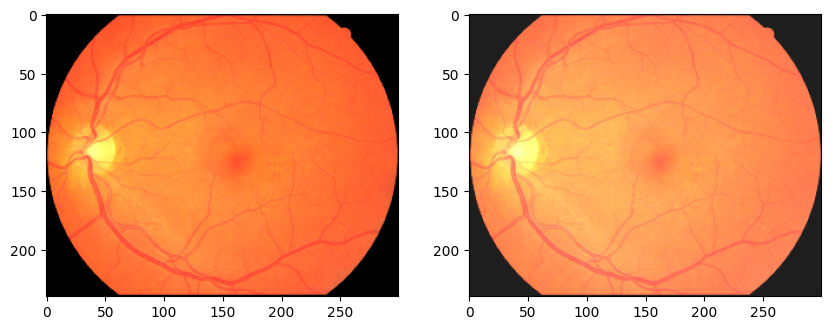

Showing g1020 fold_1 normal augmented rot...


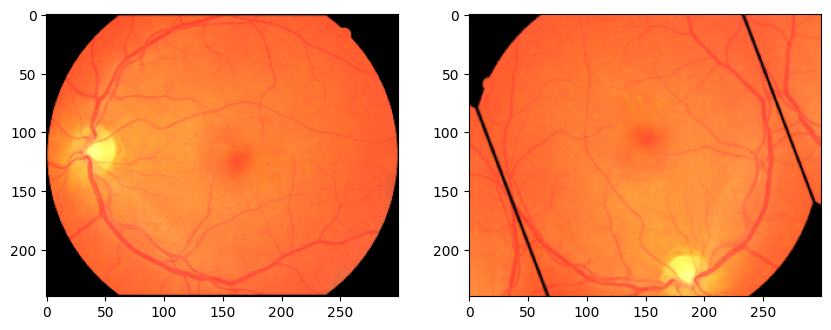

Saving g1020 fold_1 normal batch 1 augmented...
Saving g1020 fold_1 normal batch 2 augmented...
Saving g1020 fold_1 normal batch 3 augmented...
Saving g1020 fold_1 normal batch 4 augmented...
Saving g1020 fold_1 normal batch 5 augmented...
Saving g1020 fold_1 normal batch 6 augmented...
Saving g1020 fold_1 normal batch 7 augmented...
Saving g1020 fold_1 normal batch 8 augmented...
Saving g1020 fold_1 normal batch 9 augmented...
Saving g1020 fold_1 normal batch 10 augmented...
Saving g1020 fold_1 normal batch 11 augmented...
Saving g1020 fold_1 normal batch 12 augmented...
Saving g1020 fold_1 normal batch 13 augmented...
Saving g1020 fold_1 normal batch 14 augmented...
Saving g1020 fold_1 normal batch 15 augmented...
Saving g1020 fold_1 glaukoma batch 1 augmented...
Saving g1020 fold_1 glaukoma batch 2 augmented...
Saving g1020 fold_1 glaukoma batch 3 augmented...
Saving g1020 fold_1 glaukoma batch 4 augmented...
Saving g1020 fold_1 glaukoma batch 5 augmented...
Saving g1020 fold_1 glau

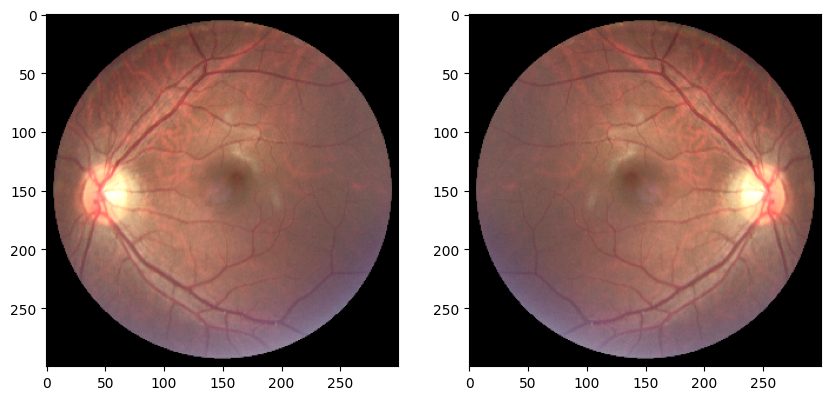

Showing refuge fold_1 normal augmented v_flip...


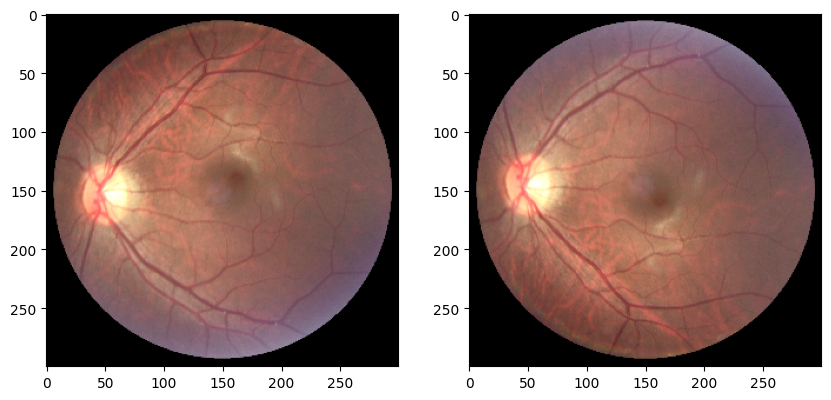

Showing refuge fold_1 normal augmented bright...


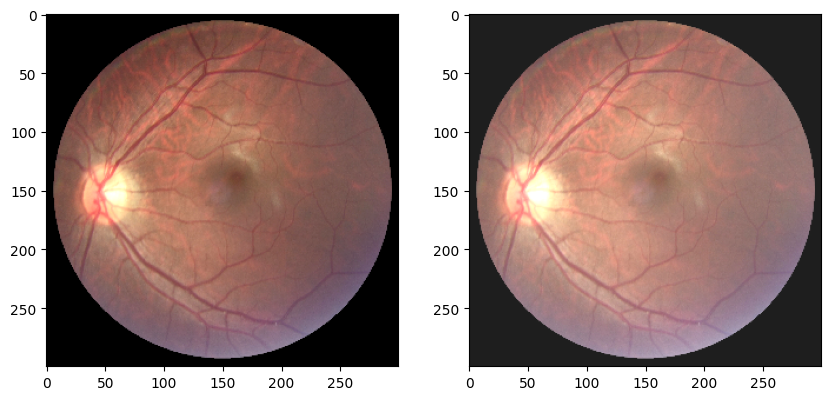

Showing refuge fold_1 normal augmented rot...


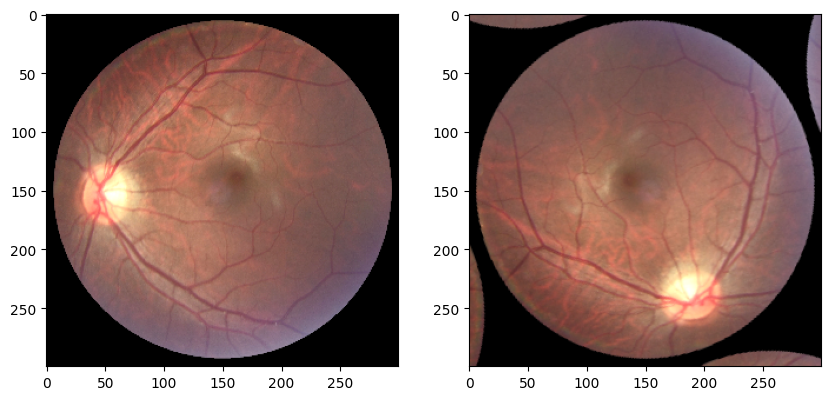

Saving refuge fold_1 normal batch 1 augmented...
Saving refuge fold_1 normal batch 2 augmented...
Saving refuge fold_1 normal batch 3 augmented...
Saving refuge fold_1 normal batch 4 augmented...
Saving refuge fold_1 normal batch 5 augmented...
Saving refuge fold_1 normal batch 6 augmented...
Saving refuge fold_1 normal batch 7 augmented...
Saving refuge fold_1 normal batch 8 augmented...
Saving refuge fold_1 normal batch 9 augmented...
Saving refuge fold_1 normal batch 10 augmented...
Saving refuge fold_1 normal batch 11 augmented...
Saving refuge fold_1 normal batch 12 augmented...
Saving refuge fold_1 normal batch 13 augmented...
Saving refuge fold_1 normal batch 14 augmented...
Saving refuge fold_1 normal batch 15 augmented...
Saving refuge fold_1 normal batch 16 augmented...
Saving refuge fold_1 normal batch 17 augmented...
Saving refuge fold_1 normal batch 18 augmented...
Saving refuge fold_1 normal batch 19 augmented...
Saving refuge fold_1 normal batch 20 augmented...
Saving re

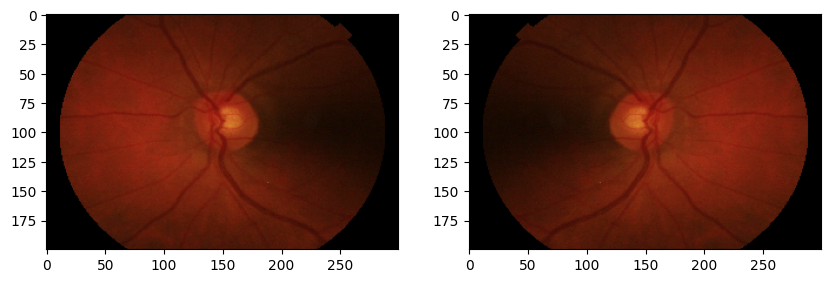

Showing papila fold_1 normal augmented v_flip...


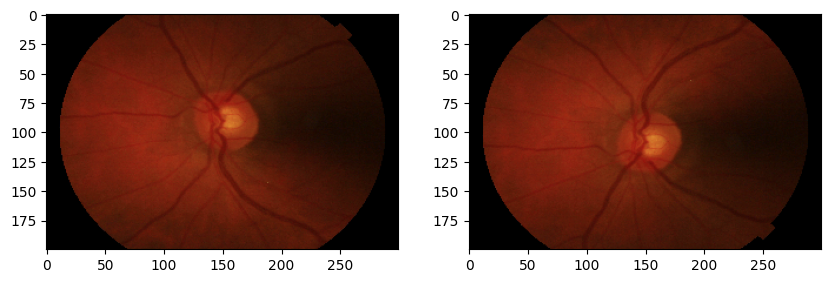

Showing papila fold_1 normal augmented bright...


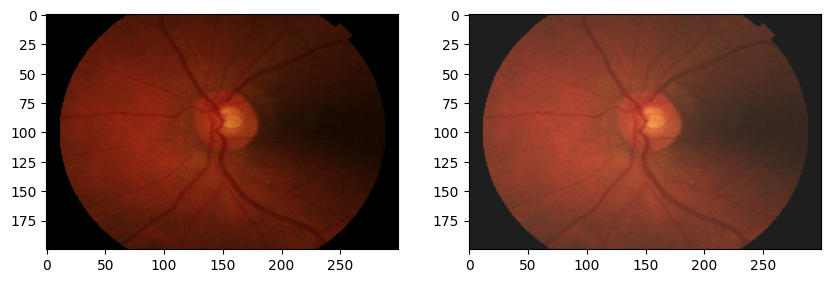

Showing papila fold_1 normal augmented rot...


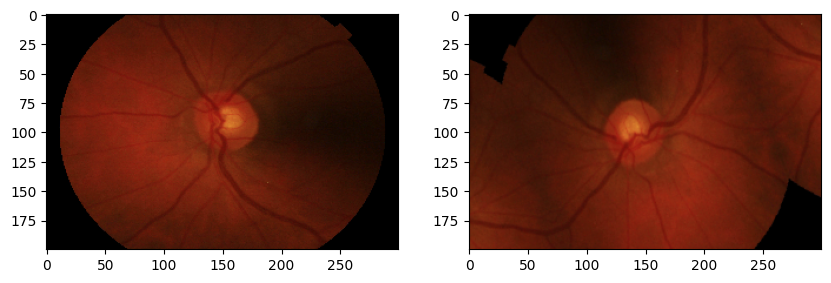

Saving papila fold_1 normal batch 1 augmented...
Saving papila fold_1 normal batch 2 augmented...
Saving papila fold_1 normal batch 3 augmented...
Saving papila fold_1 normal batch 4 augmented...
Saving papila fold_1 normal batch 5 augmented...
Saving papila fold_1 normal batch 6 augmented...
Saving papila fold_1 normal batch 7 augmented...
Saving papila fold_1 glaukoma batch 1 augmented...
Saving papila fold_1 glaukoma batch 2 augmented...
Saving papila fold_1 glaukoma batch 3 augmented...
Saving papila fold_2 normal batch 1 augmented...
Saving papila fold_2 normal batch 2 augmented...
Saving papila fold_2 normal batch 3 augmented...
Saving papila fold_2 normal batch 4 augmented...
Saving papila fold_2 normal batch 5 augmented...
Saving papila fold_2 normal batch 6 augmented...
Saving papila fold_2 normal batch 7 augmented...
Saving papila fold_2 glaukoma batch 1 augmented...
Saving papila fold_2 glaukoma batch 2 augmented...
Saving papila fold_2 glaukoma batch 3 augmented...
Saving p

In [44]:
# show the image and saving the image for scenario 2
## define a variable to exit the loop
exit_count = 0
for dataset in dataset_names:
    for fold in fold_names:
        for label in labels_name:
            ## geting the batch count
            img_count = len(s2_src[f'{dataset}_{fold}_{label}'])
            for batch_datagen in s2_src[f'{dataset}_{fold}_{label}']:
                exit_count += 1
                ## rules for preventing the infinite loop
                if exit_count == img_count:
                    exit_count = 0
                    break
                ## showing the image
                if(exit_count == 1
                    and fold == 'fold_1'
                    and label == 'normal'):
                    for augmented in s2_augment:
                        print(f'Showing {dataset} {fold} {label} augmented {augmented}...')
                        augment_image.show_augmented_img(image=batch_datagen[0][0],
                                                        augment_type=augmented,
                                                        color_mode=s2_col_mode)
                print(f'Saving {dataset} {fold} {label} batch {exit_count} augmented...')
del dataset, fold, label, img_count, batch_datagen, augmented

### Scenario 3
basic augmentation, rgb color, clahe
#### Show Image

In [1]:
# get the image using image data generator
## define the augmentation mode for scenario 3
s3_src = {}
s3_augment = ['h_flip', 'v_flip', 'bright', 'rot']
s3_col_mode = 'rgb'
## load image using image data generator
for dataset in dataset_names:
    for fold in fold_names:
        for label in labels_name:
            print(f'Loading {dataset} {fold} {label}...')
            s3_src[dataset + '_'
                    + fold + '_'
                    + label] = (datagenerator_s2345.flow_from_directory(
                                path_dataset_src[scenario_names[2] + '_'
                                                + dataset + '_'
                                                + fold],
                                target_size=image_size[dataset],
                                color_mode=s3_col_mode,
                                class_mode='binary',
                                classes=[label],
                                shuffle=True,
                                seed=1915026018,
                                save_to_dir=path_dataset_aug[scenario_names[2] + '_'
                                                            + dataset + '_'
                                                            + fold + '_'
                                                            + label],
                                save_prefix=f's3_{dataset}_{fold}_{label}',
                                save_format='jpg'))

NameError: name 'dataset_names' is not defined

### Scenario 4
basic augmentation, gray, no clahe
#### Show Image

### Scenario 5
basic augmentation, gray, clahe
#### Show Image

In [45]:
import matplotlib.pyplot as plt

In [46]:
s1_rimone_src.class_indices

NameError: name 's1_rimone_src' is not defined

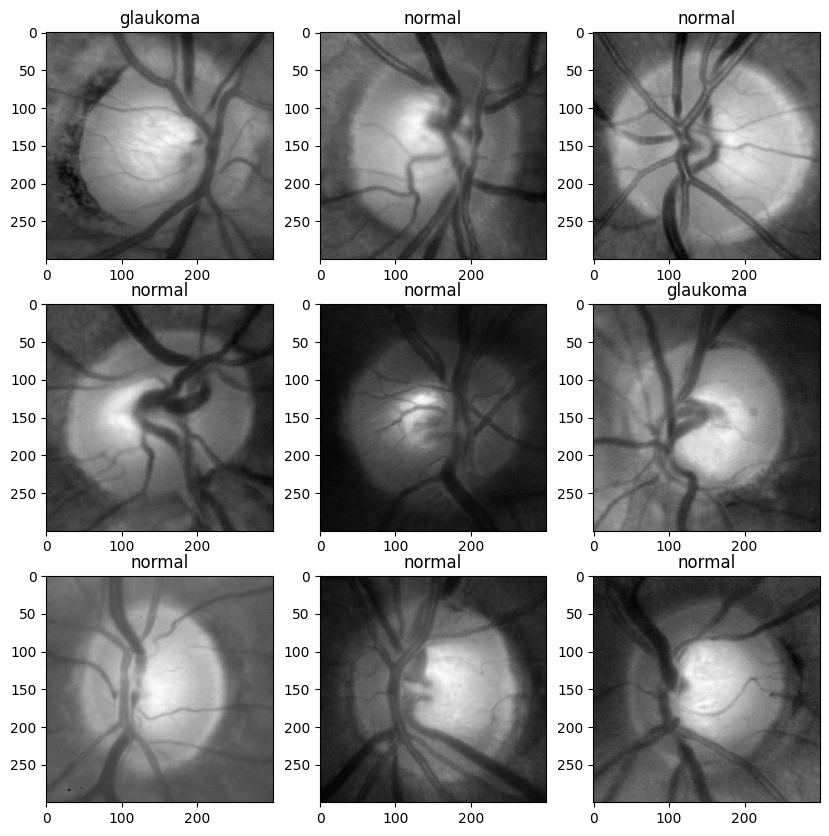

In [ ]:
fig_row = 3
fig_col = 3
position = (s1_rimone_src.batch_index - 1) * s1_rimone_src.batch_size
plt.figure(figsize=(10, 10))
image = next(s1_rimone_src)
for i in range (fig_row * fig_col):
    plt.subplot(fig_row, fig_col, i+1)
    # image = s1_rimone_src.next()
    plt.title(list(s1_rimone_src.class_indices.keys())[int(image[1][i])])
    plt.imshow(image[0][i], cmap='gray')
    # plt.title(list(s1_rimone_src.class_indices.keys())[int(s1_rimone_src[i][1][0])])
    # plt.imshow(s1_rimone_src[i][0][0])
    # plt.axis('off')